다항 회귀분석
다중 회귀분석
두개 매우 다른 것!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv', header = None)

df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']


df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'] = df['horsepower'].astype('float')

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)



In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)

print('원데이터: ', X_train.shape)
print('2차항 변환 데이터 : ', X_train_poly.shape)

원데이터:  (274, 1)
2차항 변환 데이터 :  (274, 3)


In [3]:
X_train.head()

,weight
38,4209.0
172,2223.0
277,3410.0
196,2164.0
357,2615.0


In [5]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975479


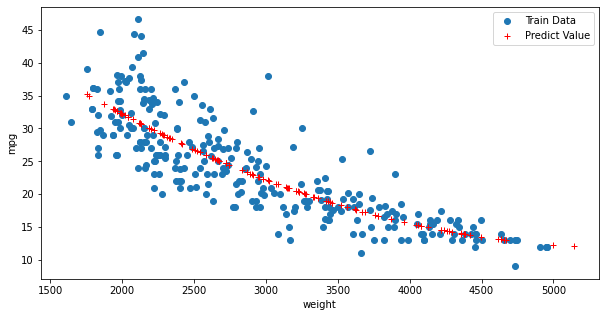

In [6]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label = 'Train Data')
ax.plot(X_test, y_hat_test, 'r+', label = 'Predict Value')
ax.legend(loc = 'best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

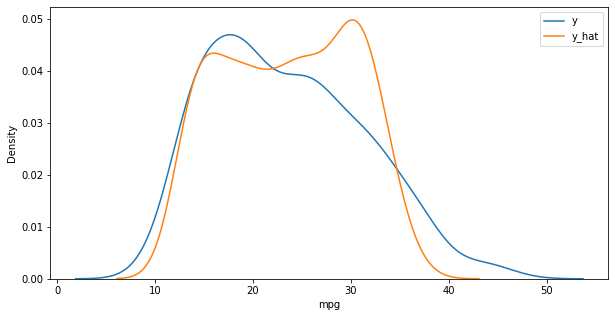

In [7]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize = (10,5))
ax1 = sns.kdeplot(y, label = 'y')
ax2 = sns.kdeplot(y_hat, label = 'y_hat', ax = ax1)

plt.legend()
plt.show()

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299322


In [11]:
print(lr.coef_)
print(lr.intercept_)

[-0.00775343]
46.7103662572801


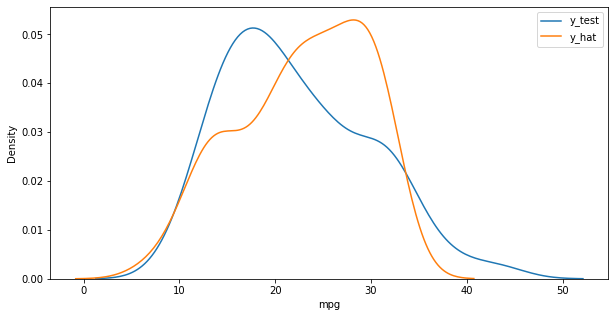

In [13]:
y_hat = lr.predict(X_test)

plt.figure(figsize = (10,5))
ax1 = sns.kdeplot(y_test, label = 'y_test')
ax2 = sns.kdeplot(y_hat, label = 'y_hat', ax = ax1)
plt.legend()
plt.show()